In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from pathlib import Path
import alpaca_trade_api as tradeapi


In [2]:
 # Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

ValueError: ('Key ID must be given to access Alpaca trade API', ' (env: APCA_API_KEY_ID)')

In [3]:
Td_data = pd.read_csv("Stock Data - NYSE_TD.csv", infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
Bmo_data = pd.read_csv("Stock Data - TSE_BMO.csv",infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
RY_data = pd.read_csv("Stock Data - TSE_RY.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
BNS_data = pd.read_csv("Stock Data - TSE_BNS.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
SP500_data = pd.read_csv("Stock Data - S&P 500.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()

In [4]:
SP500_data = pd.read_csv("Stock Data - S&P 500.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
SP500_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-04-01 16:00:00,2038.20,2038.20,1989.68,2012.66,802072115
2016-05-01 16:00:00,2013.78,2021.94,2004.17,2016.71,619260483
2016-06-01 16:00:00,2011.71,2011.71,1979.05,1990.26,734820348
2016-07-01 16:00:00,1985.32,1985.32,1938.83,1943.09,860517477
2016-08-01 16:00:00,1945.97,1960.40,1918.46,1922.03,800798104


In [5]:
SP500_data.describe()


,Open,High,Low,Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,2947.880861,2962.445086,2932.223722,2948.533907,1.944856e+09
std,715.820076,719.320943,713.003573,716.431760,8.490855e+08
min,1833.400000,1847.000000,1810.100000,1829.080000,4.309713e+06
25%,2431.940000,2441.522500,2420.930000,2432.480000,1.639540e+09
50%,2798.590000,2809.310000,2782.160000,2798.325000,2.023091e+09
75%,3279.750000,3287.575000,3253.190000,3275.690000,2.355154e+09
max,4795.490000,4808.930000,4780.040000,4793.060000,5.303923e+09


In [6]:
SP500_data.value_counts()


Open     High     Low      Close    Volume    
1833.40  1864.78  1833.40  1864.78  803669163     1
3003.36  3013.92  3001.87  3013.77  1609598303    1
3012.13  3015.02  3001.15  3004.04  1742567428    1
3010.73  3014.57  2995.04  2995.99  1843264600    1
3010.36  3021.99  3003.16  3006.79  1552070564    1
                                                 ..
2580.31  2589.32  2570.41  2582.61  2242883039    1
2580.18  2583.81  2575.57  2582.30  2045161765    1
2580.00  2595.32  2568.89  2584.96  2463516870    1
2579.49  2584.64  2578.24  2582.14  1786156942    1
4795.49  4807.02  4780.04  4786.35  1425097588    1
Length: 1510, dtype: int64

 ## Combine DataFrames, Sort Index, and Rename Columns

In [7]:
Stock_concat = pd.concat([Td_data, Bmo_data, RY_data, BNS_data, SP500_data], axis=1, join="inner", keys=["BMO", "TD", "BNS", "RY", "S&P 500"]).dropna().reset_index()

# Sort datetime index in ascending order (past to present)
Stock_concat = Stock_concat.sort_index()

# Display a few rows
Stock_concat.head()

Date    BMO                                   TD         \
                        Open   High    Low  Close   Volume   Open   High   
0 2016-04-01 16:00:00  38.63  38.64  38.14  38.56  1559196  76.82  76.99   
1 2016-05-01 16:00:00  38.60  38.72  37.99  38.26  1581170  76.67  77.05   
2 2016-07-01 16:00:00  36.44  36.89  36.20  36.22  1629706  73.78  74.22   
3 2016-11-01 16:00:00  36.40  36.42  35.82  36.09  1602427  73.68  73.94   
4 2016-12-01 16:00:00  36.55  36.89  36.21  36.73  2972123  73.98  74.63   

                 ...     RY                                S&P 500           \
     Low  Close  ...   Open   High    Low  Close   Volume     Open     High   
0  76.04  76.66  ...  55.25  55.69  54.75  55.54  2979360  2038.20  2038.20   
1  76.11  76.62  ...  55.61  56.28  55.31  56.13  2374476  2013.78  2021.94   
2  73.13  73.52  ...  54.50  54.78  54.02  54.31  2530820  1985.32  1985.32   
3  73.07  73.61  ...  54.83  54.87  53.82  54.19  2864681  1926.12  1935.65   
4  73.27  74.18  ...  54.45  54.75  53.36  54.05  2733904  1927.83  1947.38   

                                
       Low    Close     Volume  
0  1989.68  2012.66  802072115  
1  2004.17  2016.71  619260483  
2  1938.83  1943.09  860517477  
3  1901.10  1923.67  775646469  
4  1914.35  1938.68  759189614  

[5 rows x 26 columns]

In [8]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in Stock_concat:
    df_closing_prices[ticker] = Stock_concat[ticker]["close"]

KeyError: 'close'

In [27]:
type(Stock_concat["Date"])

Stock_concat["Date"] = pd.to_datetime(Stock_concat["Date"])
Stock_concat

Date    BMO                                    TD          \
                           Open   High    Low  Close   Volume    Open    High   
0    2016-04-01 16:00:00  38.63  38.64  38.14  38.56  1559196   76.82   76.99   
1    2016-05-01 16:00:00  38.60  38.72  37.99  38.26  1581170   76.67   77.05   
2    2016-07-01 16:00:00  36.44  36.89  36.20  36.22  1629706   73.78   74.22   
3    2016-11-01 16:00:00  36.40  36.42  35.82  36.09  1602427   73.68   73.94   
4    2016-12-01 16:00:00  36.55  36.89  36.21  36.73  2972123   73.98   74.63   
...                  ...    ...    ...    ...    ...      ...     ...     ...   
1461 2021-12-21 16:00:00  73.43  73.47  73.00  73.36  1426818  132.90  133.80   
1462 2021-12-22 16:00:00  73.25  74.36  73.25  74.35  1169767  132.94  135.43   
1463 2021-12-23 16:00:00  74.71  75.25  74.60  75.13  1026264  135.60  137.20   
1464 2021-12-29 16:00:00  76.24  76.65  76.05  76.19  1256191  137.77  138.25   
1465 2021-12-30 16:00:00  76.27  76.63  76.09  76.30   841164  137.21  137.60   

                      ...     RY                                 S&P 500  \
         Low   Close  ...   Open   High    Low  Close    Volume     Open   
0      76.04   76.66  ...  55.25  55.69  54.75  55.54   2979360  2038.20   
1      76.11   76.62  ...  55.61  56.28  55.31  56.13   2374476  2013.78   
2      73.13   73.52  ...  54.50  54.78  54.02  54.31   2530820  1985.32   
3      73.07   73.61  ...  54.83  54.87  53.82  54.19   2864681  1926.12   
4      73.27   74.18  ...  54.45  54.75  53.36  54.05   2733904  1927.83   
...      ...     ...  ...    ...    ...    ...    ...       ...      ...   
1461  132.01  133.14  ...  87.60  88.18  87.37  87.69   4874198  4594.96   
1462  132.90  135.35  ...  87.65  88.70  87.56  88.67   4637710  4650.36   
1463  135.57  135.58  ...  88.70  89.72  88.70  89.31   3525201  4703.96   
1464  136.77  136.94  ...  91.00  91.49  90.61  91.22   7349212  4788.64   
1465  136.48  136.59  ...  91.67  91.77  91.24  91.26  10531099  4794.23   

                                             
         High      Low    Close      Volume  
0     2038.20  1989.68  2012.66   802072115  
1     2021.94  2004.17  2016.71   619260483  
2     1985.32  1938.83  1943.09   860517477  
3     1935.65  1901.10  1923.67   775646469  
4     1947.38  1914.35  1938.68   759189614  
...       ...      ...      ...         ...  
1461  4651.14  4583.16  4649.23  2260147801  
1462  4697.67  4645.53  4696.56  1844650487  
1463  4740.74  4703.96  4725.79  1594292367  
1464  4804.06  4778.08  4793.06  1354785822  
1465  4808.93  4775.33  4778.73  1353705656  

[1466 rows x 26 columns]

In [28]:
Stock_concat.set_index("Date", inplace=True)

In [29]:
Stock_concat.index = Stock_concat.index.date

In [30]:
Stock_concat.describe()

BMO                                                       \
              Open         High          Low        Close        Volume   
count  1466.000000  1466.000000  1466.000000  1466.000000  1.466000e+03   
mean     54.079031    54.437353    53.715477    54.082169  1.521128e+06   
std       8.659822     8.665138     8.688693     8.663666  7.994694e+05   
min      33.950000    34.360000    33.490000    33.830000  2.564080e+05   
25%      47.130000    47.482500    46.830000    47.095000  1.026498e+06   
50%      55.550000    55.885000    55.200000    55.510000  1.324180e+06   
75%      58.245000    58.490000    57.955000    58.222500  1.739022e+06   
max      76.270000    76.650000    76.090000    76.300000  9.254871e+06   

                TD                                                       ...  \
              Open         High          Low        Close        Volume  ...   
count  1466.000000  1466.000000  1466.000000  1466.000000  1.466000e+03  ...   
mean     97.057572    97.646664    96.461910    97.068022  1.897911e+06  ...   
std      15.549408    15.542439    15.618791    15.579969  1.260332e+06  ...   
min      58.620000    60.000000    55.760000    56.240000  3.985360e+05  ...   
25%      86.210000    86.605000    85.925000    86.272500  1.098802e+06  ...   
50%      97.700000    98.200000    97.245000    97.720000  1.481028e+06  ...   
75%     102.320000   102.787500   101.997500   102.417500  2.210473e+06  ...   
max     140.570000   141.370000   140.010000   140.270000  1.160972e+07  ...   

                RY                                                       \
              Open         High          Low        Close        Volume   
count  1466.000000  1466.000000  1466.000000  1466.000000  1.466000e+03   
mean     71.999604    72.424509    71.560832    72.003015  2.979789e+06   
std       8.463937     8.386112     8.567416     8.477017  2.094495e+06   
min      49.140000    50.570000    46.380000    46.720000  6.672250e+05   
25%      68.240000    68.712500    67.805000    68.262500  1.685454e+06   
50%      74.450000    74.740000    74.090000    74.470000  2.312329e+06   
75%      78.180000    78.527500    77.710000    78.110000  3.473010e+06   
max      91.670000    91.770000    91.240000    91.260000  2.099180e+07   

           S&P 500                                                       
              Open         High          Low        Close        Volume  
count  1466.000000  1466.000000  1466.000000  1466.000000  1.466000e+03  
mean   2945.802729  2960.341896  2930.024250  2946.422401  1.959058e+09  
std     713.547654   717.017232   710.684259   714.147250  8.483783e+08  
min    1833.400000  1847.000000  1810.100000  1829.080000  4.309713e+06  
25%    2431.962500  2441.522500  2420.930000  2432.480000  1.661846e+09  
50%    2796.470000  2808.315000  2780.850000  2797.915000  2.031295e+09  
75%    3275.787500  3285.877500  3251.767500  3274.375000  2.360269e+09  
max    4794.230000  4808.930000  4778.080000  4793.060000  5.303923e+09  

[8 rows x 25 columns]

In [31]:
Stock_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1466 entries, 2016-04-01 to 2021-12-30
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (BMO, Open)        1466 non-null   float64
 1   (BMO, High)        1466 non-null   float64
 2   (BMO, Low)         1466 non-null   float64
 3   (BMO, Close)       1466 non-null   float64
 4   (BMO, Volume)      1466 non-null   int64  
 5   (TD, Open)         1466 non-null   float64
 6   (TD, High)         1466 non-null   float64
 7   (TD, Low)          1466 non-null   float64
 8   (TD, Close)        1466 non-null   float64
 9   (TD, Volume)       1466 non-null   int64  
 10  (BNS, Open)        1466 non-null   float64
 11  (BNS, High)        1466 non-null   float64
 12  (BNS, Low)         1466 non-null   float64
 13  (BNS, Close)       1466 non-null   float64
 14  (BNS, Volume)      1466 non-null   int64  
 15  (RY, Open)         1466 non-null   float64
 16  (RY, High)    

## Evaluate the Riskiness of Stocks

In [32]:
volatility = Stock_concat.std() * np.sqrt(252)

In [33]:
volatility = volatility.sort_values()

In [34]:
volatility

RY       High      1.331254e+02
         Open      1.343608e+02
         Close     1.345685e+02
         Low       1.360035e+02
BMO      Open      1.374704e+02
         Close     1.375314e+02
         High      1.375548e+02
         Low       1.379287e+02
BNS      High      2.251069e+02
         Open      2.253223e+02
         Close     2.253579e+02
         Low       2.258362e+02
TD       High      2.467286e+02
         Open      2.468392e+02
         Close     2.473243e+02
         Low       2.479406e+02
S&P 500  Low       1.128176e+04
         Open      1.132722e+04
         Close     1.133674e+04
         High      1.138230e+04
BMO      Volume    1.269118e+07
TD       Volume    2.000715e+07
BNS      Volume    3.176253e+07
RY       Volume    3.324907e+07
S&P 500  Volume    1.346759e+10
dtype: float64

In [35]:
daily_returns = Stock_concat.pct_change().dropna()
daily_returns

BMO                                                TD  \
                Open      High       Low     Close    Volume      Open   
2016-05-01 -0.000777  0.002070 -0.003933 -0.007780  0.014093 -0.001953   
2016-07-01 -0.055959 -0.047262 -0.047118 -0.053319  0.030696 -0.037694   
2016-11-01 -0.001098 -0.012741 -0.010497 -0.003589 -0.016739 -0.001355   
2016-12-01  0.004121  0.012905  0.010888  0.017733  0.854763  0.004072   
2016-01-13  0.014774  0.005422 -0.013532 -0.022870 -0.280689  0.006488   
...              ...       ...       ...       ...       ...       ...   
2021-12-21  0.014367  0.008788  0.015440  0.010329 -0.251536  0.006818   
2021-12-22 -0.002451  0.012114  0.003425  0.013495 -0.180157  0.000301   
2021-12-23  0.019932  0.011969  0.018430  0.010491 -0.122677  0.020009   
2021-12-29  0.020479  0.018605  0.019437  0.014109  0.224043  0.016003   
2021-12-30  0.000393 -0.000261  0.000526  0.001444 -0.330385 -0.004065   

                                                    ...        RY            \
                High       Low     Close    Volume  ...      Open      High   
2016-05-01  0.000779  0.000921 -0.000522 -0.246941  ...  0.006516  0.010594   
2016-07-01 -0.036729 -0.039154 -0.040459  0.699706  ... -0.019960 -0.026652   
2016-11-01 -0.003773 -0.000820  0.001224 -0.449301  ...  0.006055  0.001643   
2016-12-01  0.009332  0.002737  0.007744  0.109692  ... -0.006931 -0.002187   
2016-01-13  0.001742 -0.017606 -0.029388  1.192823  ... -0.004591 -0.008037   
...              ...       ...       ...       ...  ...       ...       ...   
2021-12-21  0.006469  0.014447  0.012164 -0.360652  ...  0.010614  0.013563   
2021-12-22  0.012182  0.006742  0.016599 -0.124869  ...  0.000571  0.005897   
2021-12-23  0.013069  0.020090  0.001699 -0.059906  ...  0.011979  0.011499   
2021-12-29  0.007653  0.008852  0.010031  0.328662  ...  0.025930  0.019728   
2021-12-30 -0.004702 -0.002120 -0.002556 -0.616058  ...  0.007363  0.003060   

                                           S&P 500                      \
                 Low     Close    Volume      Open      High       Low   
2016-05-01  0.010228  0.010623 -0.203025 -0.011981 -0.007978  0.007283   
2016-07-01 -0.023323 -0.032425  0.065844 -0.014133 -0.018111 -0.032602   
2016-11-01 -0.003702 -0.002210  0.131918 -0.029819 -0.025019 -0.019460   
2016-12-01 -0.008547 -0.002584 -0.045652  0.000888  0.006060  0.006970   
2016-01-13 -0.007309 -0.019426 -0.048097  0.006489  0.001515 -0.014595   
...              ...       ...       ...       ...       ...       ...   
2021-12-21  0.016876  0.009904  0.116112  0.001539  0.013784  0.011489   
2021-12-22  0.002175  0.011176 -0.048518  0.012057  0.010004  0.013609   
2021-12-23  0.013020  0.007218 -0.239883  0.011526  0.009168  0.012578   
2021-12-29  0.021533  0.021386  1.084764  0.018002  0.013357  0.015757   
2021-12-30  0.006953  0.000439  0.432956  0.001167  0.001014 -0.000576   

                                
               Close    Volume  
2016-05-01  0.002012 -0.227924  
2016-07-01 -0.036505  0.389589  
2016-11-01 -0.009994 -0.098628  
2016-12-01  0.007803 -0.021217  
2016-01-13 -0.024965  0.151972  
...              ...       ...  
2021-12-21  0.017778 -0.071420  
2021-12-22  0.010180 -0.183836  
2021-12-23  0.006224 -0.135721  
2021-12-29  0.014235 -0.150227  
2021-12-30 -0.002990 -0.000797  

[1465 rows x 25 columns]

In [36]:
Stock_concat.isnull().mean() * 100

BMO      Open      0.0
         High      0.0
         Low       0.0
         Close     0.0
         Volume    0.0
TD       Open      0.0
         High      0.0
         Low       0.0
         Close     0.0
         Volume    0.0
BNS      Open      0.0
         High      0.0
         Low       0.0
         Close     0.0
         Volume    0.0
RY       Open      0.0
         High      0.0
         Low       0.0
         Close     0.0
         Volume    0.0
S&P 500  Open      0.0
         High      0.0
         Low       0.0
         Close     0.0
         Volume    0.0
dtype: float64

In [37]:
Stock_concat.isnull().sum()

BMO      Open      0
         High      0
         Low       0
         Close     0
         Volume    0
TD       Open      0
         High      0
         Low       0
         Close     0
         Volume    0
BNS      Open      0
         High      0
         Low       0
         Close     0
         Volume    0
RY       Open      0
         High      0
         Low       0
         Close     0
         Volume    0
S&P 500  Open      0
         High      0
         Low       0
         Close     0
         Volume    0
dtype: int64

In [38]:
correlation = daily_returns.corr()
correlation

BMO                                                TD  \
                    Open      High       Low     Close    Volume      Open   
BMO     Open    1.000000  0.642037  0.799078  0.518576 -0.011209  0.766515   
        High    0.642037  1.000000  0.672365  0.639829  0.015772  0.516987   
        Low     0.799078  0.672365  1.000000  0.811727 -0.112488  0.644536   
        Close   0.518576  0.639829  0.811727  1.000000 -0.071354  0.421841   
        Volume -0.011209  0.015772 -0.112488 -0.071354  1.000000  0.000283   
TD      Open    0.766515  0.516987  0.644536  0.421841  0.000283  1.000000   
        High    0.630069  0.631427  0.677840  0.622486  0.019747  0.761815   
        Low     0.641223  0.576957  0.789527  0.696875 -0.041864  0.760251   
        Close   0.449638  0.542084  0.670870  0.816641 -0.022992  0.468475   
        Volume  0.005410  0.005977 -0.058407 -0.055537  0.211140 -0.023652   
BNS     Open    0.761574  0.513047  0.652562  0.474430  0.012207  0.744418   
        High    0.615422  0.634003  0.716354  0.693147  0.011537  0.600547   
        Low     0.661157  0.576287  0.814414  0.686394 -0.072341  0.635702   
        Close   0.398499  0.500631  0.662249  0.813363 -0.062075  0.360555   
        Volume  0.004461  0.014959 -0.042604 -0.020258  0.159788  0.004504   
RY      Open    0.766786  0.498788  0.632791  0.420739  0.003137  0.767227   
        High    0.622237  0.649187  0.688295  0.666108  0.013440  0.619847   
        Low     0.633023  0.567691  0.790473  0.683539 -0.073583  0.622998   
        Close   0.444775  0.546779  0.684751  0.825671 -0.041510  0.411179   
        Volume -0.029314 -0.005573 -0.079832 -0.048356  0.196637 -0.018162   
S&P 500 Open    0.599239  0.413010  0.496163  0.293476 -0.022298  0.584931   
        High    0.565421  0.535777  0.632109  0.607858 -0.018769  0.539424   
        Low     0.523983  0.455575  0.661496  0.593803 -0.104472  0.507435   
        Close   0.352829  0.385354  0.573140  0.725665 -0.062589  0.315842   
        Volume  0.022513  0.038495  0.035621  0.049478 -0.014543 -0.001184   

                                                        ...        RY  \
                    High       Low     Close    Volume  ...      Open   
BMO     Open    0.630069  0.641223  0.449638  0.005410  ...  0.766786   
        High    0.631427  0.576957  0.542084  0.005977  ...  0.498788   
        Low     0.677840  0.789527  0.670870 -0.058407  ...  0.632791   
        Close   0.622486  0.696875  0.816641 -0.055537  ...  0.420739   
        Volume  0.019747 -0.041864 -0.022992  0.211140  ...  0.003137   
TD      Open    0.761815  0.760251  0.468475 -0.023652  ...  0.767227   
        High    1.000000  0.819834  0.760484  0.036816  ...  0.581035   
        Low     0.819834  1.000000  0.814959 -0.111419  ...  0.621142   
        Close   0.760484  0.814959  1.000000 -0.049667  ...  0.402431   
        Volume  0.036816 -0.111419 -0.049667  1.000000  ... -0.011807   
BNS     Open    0.601024  0.628465  0.469024 -0.011144  ...  0.751572   
        High    0.747281  0.707370  0.680088  0.005717  ...  0.587074   
        Low     0.679623  0.798739  0.689551 -0.064041  ...  0.619592   
        Close   0.575014  0.667600  0.825647 -0.047224  ...  0.359007   
        Volume  0.033851 -0.031714  0.004359  0.506847  ... -0.000969   
RY      Open    0.581035  0.621142  0.402431 -0.011807  ...  1.000000   
        High    0.791950  0.715151  0.670781  0.012021  ...  0.726609   
        Low     0.664753  0.821412  0.679221 -0.086707  ...  0.753176   
        Close   0.637261  0.707476  0.837803 -0.068543  ...  0.471792   
        Volume -0.002156 -0.076294 -0.056545  0.536518  ... -0.037110   
S&P 500 Open    0.501828  0.502395  0.302707  0.003883  ...  0.516591   
        High    0.608805  0.630364  0.585819  0.010043  ...  0.470320   
        Low     0.536618  0.649412  0.567398 -0.081716  ...  0.451577   
        Close   0.413283  0.551063  0.681618 -0.064033  ...  0.298099   
        Volume  

## Plot Correlation

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

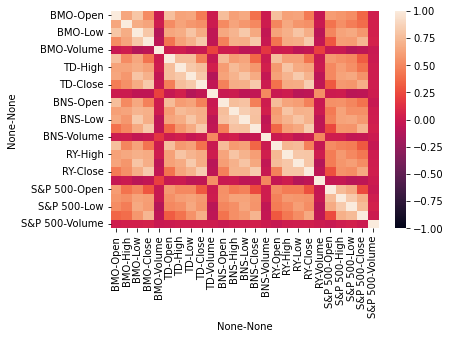

In [39]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1) 

## Plot daily Closing Price of each stocks

<AxesSubplot:xlabel='Date'>

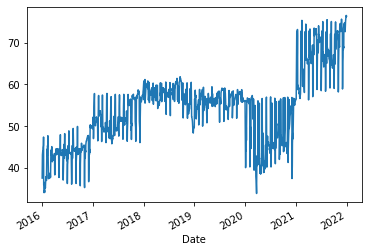

In [40]:
Td_data["Close"].plot()

<AxesSubplot:xlabel='Date'>

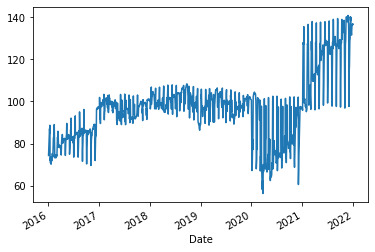

In [41]:
Bmo_data["Close"].plot()

<AxesSubplot:xlabel='Date'>

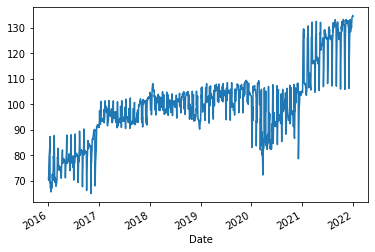

In [42]:
RY_data["Close"].plot()

<AxesSubplot:xlabel='Date'>

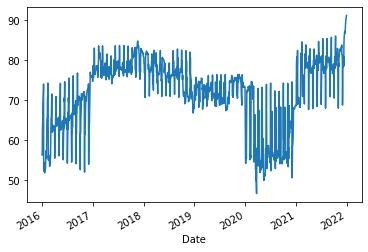

In [43]:
BNS_data["Close"].plot()

<AxesSubplot:xlabel='Date'>

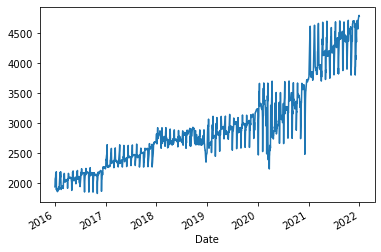

In [45]:
SP500_data["Close"].plot()

## Calculate 20-Day Simple Moving Average (SMA20)


In [49]:
sma20 = Stock_concat.rolling(window=20).mean()
sma20.dropna()

BMO                                               TD  \
               Open     High      Low    Close      Volume      Open   
2016-03-02  36.4375  36.7095  35.8990  36.3560  2107478.75   73.3065   
2016-04-02  36.4025  36.7030  35.8885  36.3420  2103074.25   73.1530   
2016-05-02  36.3765  36.6760  35.8655  36.3125  2093476.05   73.0405   
2016-08-02  36.4090  36.6880  35.8890  36.3500  2103853.90   73.0270   
2016-09-02  36.4140  36.7145  35.8915  36.3570  2147349.30   72.9795   
...             ...      ...      ...      ...         ...       ...   
2021-12-21  74.1405  74.7260  73.5675  74.0600  2338879.95  137.3020   
2021-12-22  74.1170  74.7465  73.5700  74.1165  2319844.20  137.0390   
2021-12-23  74.1465  74.7350  73.6175  74.1135  2122406.20  136.8565   
2021-12-29  74.2140  74.7810  73.6805  74.1420  2084771.45  136.7755   
2021-12-30  74.3000  74.8715  73.8320  74.2885  2014418.50  136.6865   

                                                      ...       RY           \
                High       Low     Close      Volume  ...     Open     High   
2016-03-02   73.9095   72.4840   73.3440  1768839.25  ...  54.3760  54.8415   
2016-04-02   73.8170   72.3665   73.2365  1735947.60  ...  54.4085  54.9135   
2016-05-02   73.6985   72.2535   73.1220  1712574.65  ...  54.4710  54.9510   
2016-08-02   73.6825   72.2380   73.1225  1680467.45  ...  54.5610  55.0320   
2016-09-02   73.6220   72.1145   73.0185  1741310.30  ...  54.5695  55.0405   
...              ...       ...       ...         ...  ...      ...      ...   
2021-12-21  138.2370  136.0860  136.8745  1881874.70  ...  84.5615  85.3290   
2021-12-22  138.0370  135.8440  136.7115  1847964.70  ...  84.8000  85.6175   
2021-12-23  137.8845  135.6770  136.4980  1854001.15  ...  85.1080  85.9335   
2021-12-29  137.7755  135.5500  136.3340  1866491.70  ...  85.4955  86.3330   
2021-12-30  137.6865  135.5285  136.3130  1836877.45  ...  85.9710  86.7900   

                                            S&P 500                        \
                Low    Close      Volume       Open       High        Low   
2016-03-02  53.6820  54.3715  3021895.80  1919.4865  1933.9980  1892.9750   
2016-04-02  53.7340  54.4375  3008063.40  1913.1600  1928.4555  1888.5170   
2016-05-02  53.7840  54.4710  2973706.60  1908.1245  1923.0120  1881.9410   
2016-08-02  53.8410  54.5395  2965393.15  1902.5210  1917.4085  1876.4225   
2016-09-02  53.8085  54.5385  3000828.60  1898.6380  1914.0385  1873.1145   
...             ...      ...         ...        ...        ...        ...   
2021-12-21  84.1700  84.8210  4770235.50  4641.3190  4673.1560  4606.2515   
2021-12-22  84.4340  85.1385  4829606.00  4638.2370  4670.8480  4604.4195   
2021-12-23  84.7420  85.4340  4590420.00  4639.5110  4672.9155  4606.9845   
2021-12-29  85.1200  85.8340  4883349.80  4645.1540  4677.9750  4612.8940   
2021-12-30  85.6280  86.3255  5244349.30  4653.4280  4684.7740  4620.3975   

                                     
                Close        Volume  
2016-03-02  1914.8005  6.947579e+08  
2016-04-02  1909.9400  6.979309e+08  
2016-05-02  1903.1070  7.102845e+08  
2016-08-02  1898.6245  7.179033e+08  
2016-09-02  1895.0515  7.214878e+08  
...               ...           ...  
2021-12-21  4640.2255  2.623653e+09  
2021-12-22  4640.9065  2.592577e+09  
2021-12-23  4642.6610  2.560848e+09  
2021-12-29  4647.2410  2.536012e+09  
2021-12-30  4653.4140  2.478833e+09  

[1447 rows x 25 columns]

## Calculate 50-Day Simple Moving Average (SMA50)



In [51]:
sma50 = Stock_concat.rolling(window=50).mean()
sma50.dropna()

BMO                                               TD  \
               Open     High      Low    Close      Volume      Open   
2016-03-17  37.8960  38.2568  37.4852  37.9668  1819353.50   74.2688   
2016-03-18  37.9868  38.3492  37.5716  38.0458  1825952.26   74.3146   
2016-03-21  38.0636  38.4300  37.6576  38.1314  1814873.42   74.3548   
2016-03-22  38.1802  38.5448  37.7778  38.2572  1811644.50   74.4552   
2016-03-23  38.2978  38.6638  37.8956  38.3756  1804809.66   74.5642   
...             ...      ...      ...      ...         ...       ...   
2021-12-21  73.0012  73.4968  72.5840  73.0372  1702928.72  136.4778   
2021-12-22  73.1004  73.5980  72.6856  73.1402  1698995.28  136.5440   
2021-12-23  73.2152  73.7192  72.8052  73.2680  1699803.06  136.6514   
2021-12-29  73.3652  73.8730  72.9692  73.4246  1703194.12  136.8168   
2021-12-30  73.5118  74.0206  73.1178  73.5690  1700507.80  136.9590   

                                                      ...       RY           \
                High       Low     Close      Volume  ...     Open     High   
2016-03-17   74.9076   73.5464   74.3554  1579901.48  ...  56.1430  56.6708   
2016-03-18   74.9616   73.5978   74.3944  1618798.18  ...  56.3114  56.8364   
2016-03-21   75.0076   73.6422   74.4428  1606519.16  ...  56.4742  56.9928   
2016-03-22   75.1078   73.7496   74.5456  1579123.12  ...  56.6512  57.1740   
2016-03-23   75.2126   73.8556   74.6470  1572273.26  ...  56.8308  57.3528   
...              ...       ...       ...         ...  ...      ...      ...   
2021-12-21  137.3538  135.6284  136.5010  2254438.04  ...  82.8090  83.3566   
2021-12-22  137.4410  135.6986  136.5940  2261132.04  ...  83.0082  83.5610   
2021-12-23  137.5782  135.8230  136.7126  2248483.96  ...  83.2180  83.7820   
2021-12-29  137.7488  135.9902  136.8612  2247824.58  ...  83.4680  84.0376   
2021-12-30  137.8844  136.1282  136.9790  2238807.98  ...  83.7252  84.2882   

                                            S&P 500                        \
                Low    Close      Volume       Open       High        Low   
2016-03-17  55.4854  56.2274  2760192.12  1932.7130  1946.6860  1914.9078   
2016-03-18  55.6556  56.3880  2823466.74  1932.7722  1946.9692  1915.9374   
2016-03-21  55.8100  56.5386  2809288.74  1933.4542  1947.6086  1916.7168   
2016-03-22  55.9928  56.7204  2790973.24  1934.7206  1949.0342  1918.7516   
2016-03-23  56.1756  56.9020  2766879.60  1937.1692  1951.2922  1921.4268   
...             ...      ...         ...        ...        ...        ...   
2021-12-21  82.4230  82.9794  3712303.74  4605.9120  4629.6624  4583.9576   
2021-12-22  82.6242  83.1854  3760231.50  4610.7890  4635.3754  4589.1438   
2021-12-23  82.8386  83.4010  3714599.28  4617.5020  4642.6924  4596.3812   
2021-12-29  83.0978  83.6538  3768861.98  4626.1146  4651.3162  4605.3444   
2021-12-30  83.3508  83.8976  3780496.38  4634.2642  4658.7002  4613.1160   

                                     
                Close        Volume  
2016-03-17  1933.4610  7.165760e+08  
2016-03-18  1934.1994  7.139228e+08  
2016-03-21  1934.8972  7.122492e+08  
2016-03-22  1937.0314  7.061485e+08  
2016-03-23  1939.2922  7.014783e+08  
...               ...           ...  
2021-12-21  4609.4954  2.276102e+09  
2021-12-22  4615.5998  2.279113e+09  
2021-12-23  4623.1026  2.271757e+09  
2021-12-29  4631.6878  2.260065e+09  
2021-12-30  4638.4972  2.248238e+09  

[1417 rows x 25 columns]

## Overlay Daily Closing Prices of SHOP and SMAs


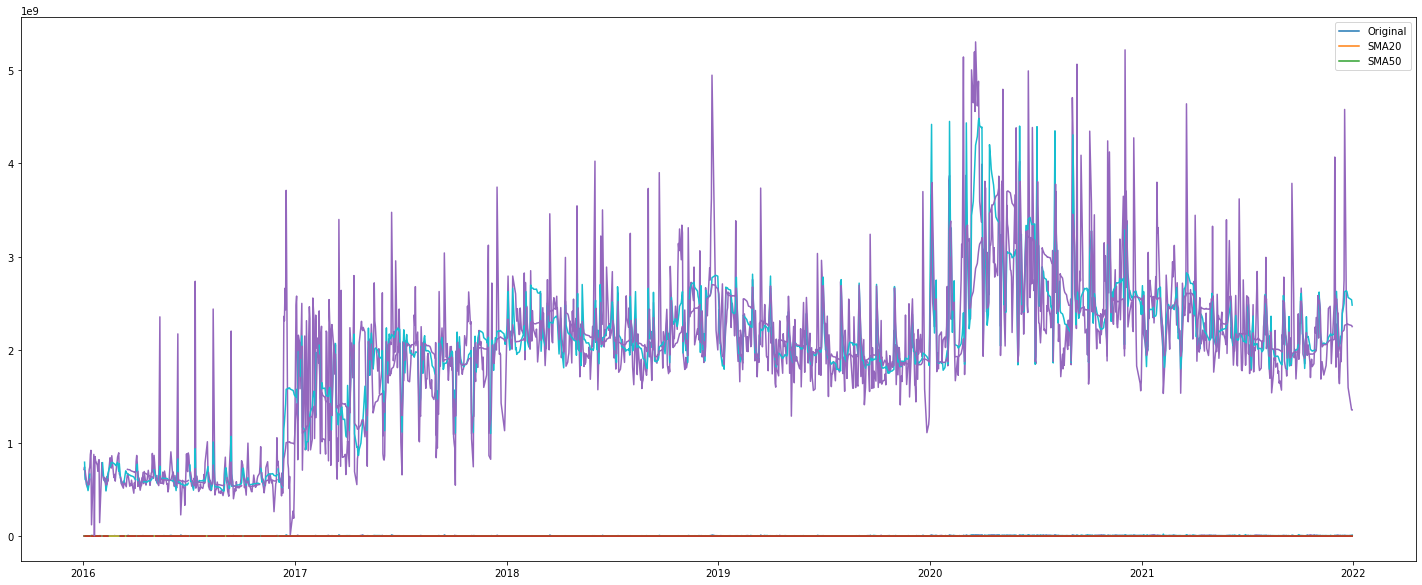

In [57]:
# Set figure of the daily closing prices of SHOP
ax = Stock_concat.plot(figsize=(25,10))

# Overlay SMA20, SMA50, and SMA100 on the same figure
sma20.plot(ax=ax)
sma50.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Original", "SMA20", "SMA50"]);

In [10]:
from MCForecastTools import MCSimulation 

## Simulate five year portfolio growth with evenly-distributed stock investments


In [11]:
MC_even_dist = MCSimulation(
    portfolio_data = Stock_concat,
    weights = [.20,.20,.20, .20, .20],
    num_simulation = 1000,
    num_trading_days = 252*5
)


KeyError: 'close'

## Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns


In [46]:
td_covaraince = daily_returns["TD"].cov(SP_return["S&P 500"])
td_covaraince

KeyError: 'S&P 500'